# Post-Cleaning Model (Revisited)
## Steps:
1. Add the libraries
2. Read the cleaned data
3. Revisit the model created immediately post-cleaning.

### Add those libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
%matplotlib inline



In [2]:
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv ('clean_df.csv') 
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49,2


### Give me that Post-Cleaning Model! 

In [4]:
outcome = 'price'

x_cols = df.drop(['price', 'date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f,data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.692      
Dependent Variable:       price                AIC:                    577057.9404
Date:                     2020-07-28 14:54     BIC:                    577209.1626
No. Observations:         21143                Log-Likelihood:         -2.8851e+05
Df Model:                 18                   F-statistic:            2640.      
Df Residuals:             21124                Prob (F-statistic):     0.00       
R-squared:                0.692                Scale:                  4.1723e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept     -726150.7620 2987578.3420  -0.2431 0.8080 -6582032.2437 5129730.7197
bedrooms       -39822.5849    1945.7308 -20.4666 0.0000   -43636.3658  -36008.8040
bathrooms       43063.2754    3348.0219  12.8623 0.0000    36500.8972   49625.6537
sqft_living       167.3777       4.4596  37.5316 0.0000      158.6364     176.1189
sqft_lot            0.1514       0.0496   3.0545 0.0023        0.0542       0.2485
floors           9721.4809    3697.7364   2.6290 0.0086     2473.6353   16969.3264
waterfront     789293.3156   17457.9612  45.2111 0.0000   755074.3798  823512.2515
condition       28233.2405    2406.5964  11.7316 0.0000    23516.1281   32950.3530
grade          100993.0498    2207.0610  45.7591 0.0000    96667.0418  105319.0579
sqft_above         12.8139       4.4123   2.9041 0.0037        4.1655      21.4623
yr_built        -2800.6046      73.5933 -38.0551 0.0000    -2944.8531   -2656.3560
yr_renovated       26.5565       4.0885   6.4954 0.0000       18.5427      34.5703
zipcode          -513.9323      33.6925 -15.2536 0.0000     -579.9722    -447.8924
lat            575905.5511   10964.2836  52.5256 0.0000   554414.7187  597396.3836
long          -233433.4315   13488.7312 -17.3058 0.0000  -259872.3737 -206994.4893
sqft_living15      35.6046       3.4880  10.2077 0.0000       28.7678      42.4415
sqft_lot15         -0.3638       0.0758  -4.7999 0.0000       -0.5123      -0.2152
day_of_year      -459.1424     162.7513  -2.8211 0.0048     -778.1474    -140.1374
month           10633.2303    4949.5486   2.1483 0.0317      931.7375   20334.7231
----------------------------------------------------------------------------------
Omnibus:                 17780.441          Durbin-Watson:             1.991      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1686849.325
Skew:                    3.522              Prob(JB):                  0.000      
Kurtosis:                46.188             Condition No.:             214019930  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Let's dive in and dig out the mean squared error and root mean squared error
- Keep in mind we have not normalized our continuous variables, handled the location data, or handled the categorical variables
- Prediction: Less than ideal model but this is almost like a Baseline Part II. It's part of the process!

In [5]:
# Import two libraries. One gives us our train test split and the other fits a linear model with coefficients w = (w1, …, wp) 
# to minimize the residual sum of squares between the observed targets in the dataset, 
# and the targets predicted by the linear approximation. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [6]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
len(y_test)
# Verify that our test data is 20% of our total data 

4229

In [8]:
# Find the Mean Squared Error
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 41387277285.05706
Test Mean Squarred Error: 45410124586.00533


#### Note: There is enough difference between the error in train & test that we can believe this model may not work well with outside information. Will be good to check what happens when we normalize our continuous variables.

In [9]:
# Find the Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

# Result: Not something we would show to a client as this model will be more than 200,000 dollars off the target. Incredibly inaccurate

Train Root Mean Squarred Error: 203438.63272509738
Test Root Mean Squarred Error: 213096.51472045557


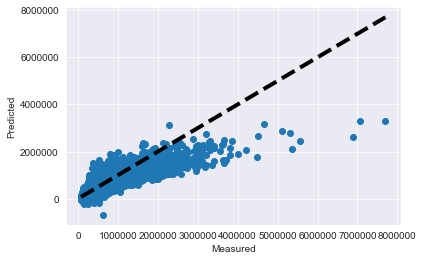

In [10]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Will be good to see what happens when we eliminate the outliers later on 
# We aren't concerned with houses greater than 500,000 dollars.

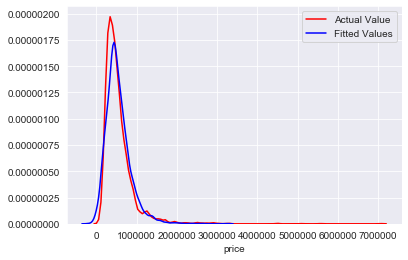

In [11]:

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Model II: Normalize the Continuous Variables

In [12]:
# First, let's get candidates for normalization

In [13]:
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

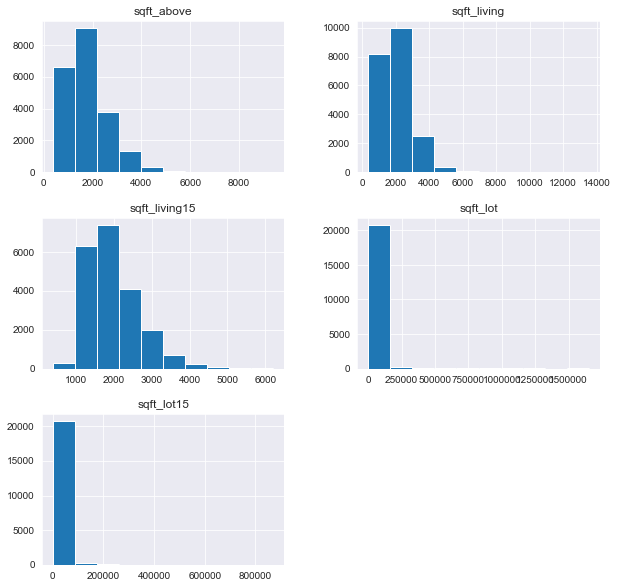

In [14]:
df[norm_candidates].hist(figsize=(10,10));

# These columns are deeply in need of normalization. Let's do log transformations in the next cell

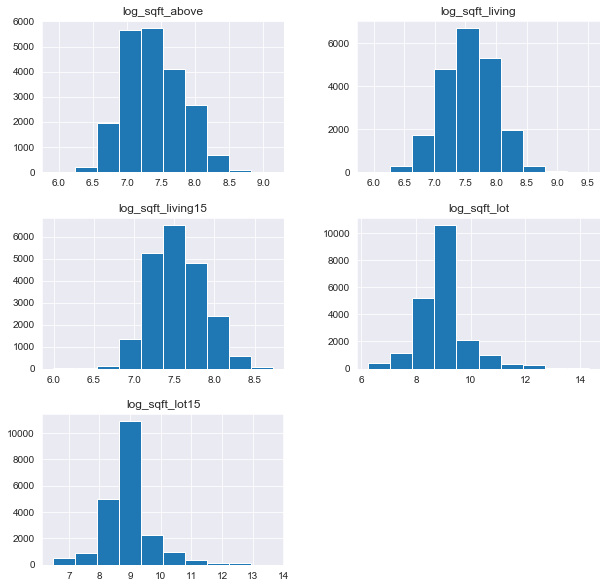

In [15]:
# Make a copy of the df so we don't make mistakes that we can't take back. 
df_log = df.copy()

# log-transform the columns
log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

# Make a list of the logged columns
logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

#Create new variables for each column
df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

# Check results with a histogram
df_log[logs].hist(figsize=(10,10));

#### Much better! Above variables have been normalized.

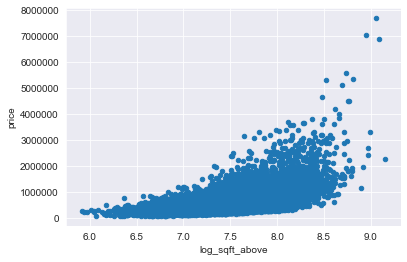

In [16]:
# Verify linearity has remained. Let's check out sqft_living
df_log.plot(kind = 'scatter', x = 'log_sqft_above', y = 'price')
# Results: Not bad. Let's continue.

In [17]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

# Dropped the non-logged columns from the log_df

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,...,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0.0,3,7,0.0,...,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,3,7,400.0,...,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022


In [18]:
# Let's check out the correlation before we continue
pd.set_option('display.max_columns', 500)
df_log.corr()
# Note: Month & Day of Year are pretty weak. Unsure how much stock we should put into them regardless of P-Value

,id,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.000000,-0.015796,0.002487,0.006120,0.019281,-0.002920,-0.023186,0.008681,-0.004548,0.022218,-0.009225,-0.011183,-0.004728,0.021373,-0.010704,-0.010972,-0.000912,-0.001148,-0.003182,-0.148953,-0.146475
price,-0.015796,1.000000,0.309204,0.525889,0.256355,0.265969,0.035290,0.667738,0.325008,0.054459,0.116719,-0.053166,0.306507,0.022101,-0.011826,-0.010234,0.542387,0.611883,0.544671,0.161204,0.148068
bedrooms,0.002487,0.309204,1.000000,0.513840,0.179044,0.000061,0.025710,0.356882,0.302683,0.157017,0.018452,-0.152628,-0.009521,0.131093,-0.002217,-0.001520,0.515674,0.621250,0.405475,0.184970,0.161747
bathrooms,0.006120,0.525889,0.513840,1.000000,0.504071,0.064626,-0.128015,0.666493,0.282693,0.508408,0.047955,-0.204306,0.024994,0.224479,0.007443,0.008058,0.695560,0.761546,0.571997,0.099976,0.091383
floors,0.019281,0.256355,0.179044,0.504071,1.000000,0.020307,-0.264280,0.459214,-0.245144,0.489665,0.003526,-0.058976,0.048977,0.125922,0.013227,0.013905,0.548124,0.368091,0.275729,-0.237104,-0.227203
waterfront,-0.002920,0.265969,0.000061,0.064626,0.020307,1.000000,0.016728,0.083602,0.084949,-0.023843,0.070231,0.028152,-0.011567,-0.036371,0.010418,0.009182,0.059020,0.079399,0.077438,0.071283,0.080974
condition,-0.023186,0.035290,0.025710,-0.128015,-0.264280,0.016728,1.000000,-0.148508,0.170972,-0.362107,-0.056205,0.003437,-0.015592,-0.106285,0.021466,0.021903,-0.151398,-0.051842,-0.090006,0.072183,0.078681
grade,0.008681,0.667738,0.356882,0.666493,0.459214,0.083602,-0.148508,1.000000,0.168023,0.448120,0.015882,-0.185131,0.113380,0.199187,0.007226,0.008571,0.743247,0.743322,0.688863,0.184189,0.185350
sqft_basement,-0.004548,0.325008,0.302683,0.282693,-0.245144,0.084949,0.170972,0.168023,1.000000,-0.132844,0.067145,0.075381,0.110637,-0.145174,0.005981,0.007052,-0.051499,0.423250,0.207061,0.093628,0.080550
yr_built,0.022218,0.054459,0.157017,0.508408,0.489665,-0.023843,-0.362107,0.448120,-0.132844,1.000000,-0.200377,-0.347320,-0.148725,0.409317,-0.005850,-0.005252,0.452893,0.351017,0.333001,-0.006493,0.019512


In [19]:
x_cols = df_log.drop(['price','date','id','zipcode'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model = smf.ols(formula=f, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                     Adj. R-squared:            0.673      
Dependent Variable:          price                   AIC:                       578342.0779
Date:                        2020-07-28 14:54        BIC:                       578493.3001
No. Observations:            21143                   Log-Likelihood:            -2.8915e+05
Df Model:                    18                      F-statistic:               2416.      
Df Residuals:                21124                   Prob (F-statistic):        0.00       
R-squared:                   0.673                   Scale:                     4.4336e+10 
-------------------------------------------------------------------------------------------
                      Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------------------
Intercept         -32453660.6717 1746660.0822 -18.5804 0.0000 -35877247.6907 -29030073.6526
bedrooms             -19948.1579    2078.6651  -9.5966 0.0000    -24022.5001    -15873.8158
bathrooms             77396.9750    3437.1733  22.5176 0.0000     70659.8531     84134.0968
floors                -3924.4076    4171.6640  -0.9407 0.3469    -12101.1873      4252.3721
waterfront           790158.3491   18058.7611  43.7548 0.0000    754761.7996    825554.8986
condition             30069.8520    2470.7516  12.1703 0.0000     25226.9903     34912.7137
grade                135274.1844    2197.7163  61.5522 0.0000    130966.4929    139581.8760
sqft_basement           378.2800       9.4166  40.1714 0.0000       359.8227       396.7374
yr_built              -2977.9497      75.0681 -39.6700 0.0000     -3125.0889     -2830.8105
yr_renovated             22.8022       4.2172   5.4069 0.0000        14.5361        31.0683
lat                  535219.2150   11129.8871  48.0885 0.0000    513403.7872    557034.6428
long                 -87309.6262   12914.6506  -6.7605 0.0000   -112623.3267    -61995.9256
day_of_year            -378.9790     167.7722  -2.2589 0.0239      -707.8253       -50.1326
month                  8336.5288    5102.2228   1.6339 0.1023     -1664.2170     18337.2747
log_sqft_above       707380.1122   18061.3742  39.1654 0.0000    671978.4409    742781.7836
log_sqft_living     -605040.4349   19555.9400 -30.9390 0.0000   -643371.5692   -566709.3005
log_sqft_living15    109741.3923    7389.2694  14.8515 0.0000     95257.8606    124224.9240
log_sqft_lot           8919.7137    4229.8301   2.1088 0.0350       628.9239     17210.5035
log_sqft_lot15       -18246.4606    4594.8699  -3.9711 0.0001    -27252.7561     -9240.1651
-------------------------------------------------------------------------------------------
Omnibus:                    18846.945             Durbin-Watson:                1.987      
Prob(Omnibus):              0.000                 Jarque-Bera (JB):             2185608.026
Skew:                       3.816                 Prob(JB):                     0.000      
Kurtosis:                   52.221                Condition No.:                2421852    
===========================================================================================
* The condition number is large (2e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Notes on Model II: 
1. The R-Squared decreased when we normalized the continuous variable from 0.692 to 0.673
2. Reminder that we have not yet handled the categorical variables and have not binned the zipcodes
3. Will be interesting to see what happens when we split the county into sectors. 
4. Looking at the P>|t|, Floors and Month seem to be insignificant as their p-values are quite above our 0.05 confidence level
5. Looking at the Kurtosis, we have a high peak in our data (a Normal distribution has a Kurtosis of 3)
6. Our data is skewed. Normal distribution has a skew of 0. A skew of 3 isn't too bad, though, and hopefully will decrease as we get rid of outliers.

## Let's look at the error for Model II

In [20]:
data = df_log
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

# Much closer results between the Train and Test! We are getting better. 

Train Mean Squarred Error: 41141816169.82353
Test Mean Squarred Error: 57221756558.4971


In [23]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

# Still would not show this to a client as we are quite a ways off from being reliable. 

Train Root Mean Squarred Error: 202834.45508547983
Test Root Mean Squarred Error: 239210.6949082693


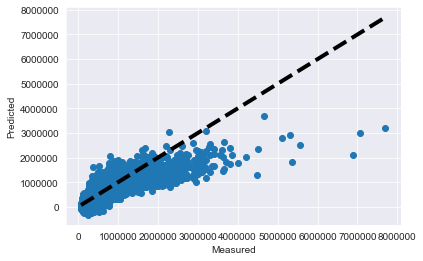

In [24]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Our next move should be to handle the location information, categorical variables, and outliers.

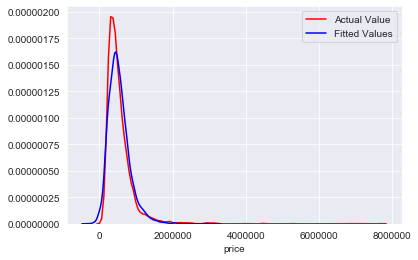

In [25]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

# We have to get better at modeling.

# Before we create Model III we will handle the rest of the data.

## Renovated--> It seems that most non-0 instances begin around the year 2000. Let's examine this further:

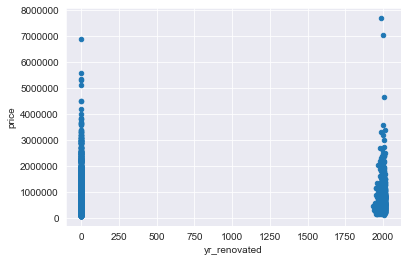

In [26]:
df_log.plot(kind='scatter', x='yr_renovated', y='price')
# Original plot of all yr_renovated instances

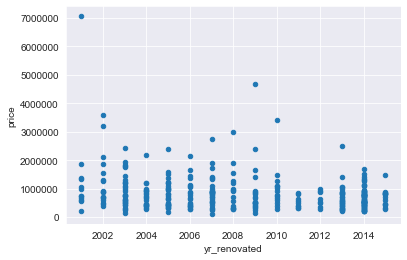

In [27]:
df_newren = df[df["yr_renovated"] > 2000]
df_newren.plot(kind='scatter', x='yr_renovated', y='price');

# Only examine year 2000 forward. Let's add this as a column

In [28]:
df_log['renovpost2000'] = np.where(df['yr_renovated'] > 2000, 1, 0)

In [30]:
df_2 = df_log

In [31]:
df_2.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,renovpost2000
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,0
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,56,2,6.646391,6.646391,7.908387,9.210340,8.994917,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,343,12,6.956545,7.580700,7.215240,8.517193,8.517193,0
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,49,2,7.426549,7.426549,7.495542,8.997147,8.923058,0


In [32]:
df_2.renovpost2000.value_counts(normalize=True)

0    0.983872
1    0.016128
Name: renovpost2000, dtype: float64

1.6% have been renovated 

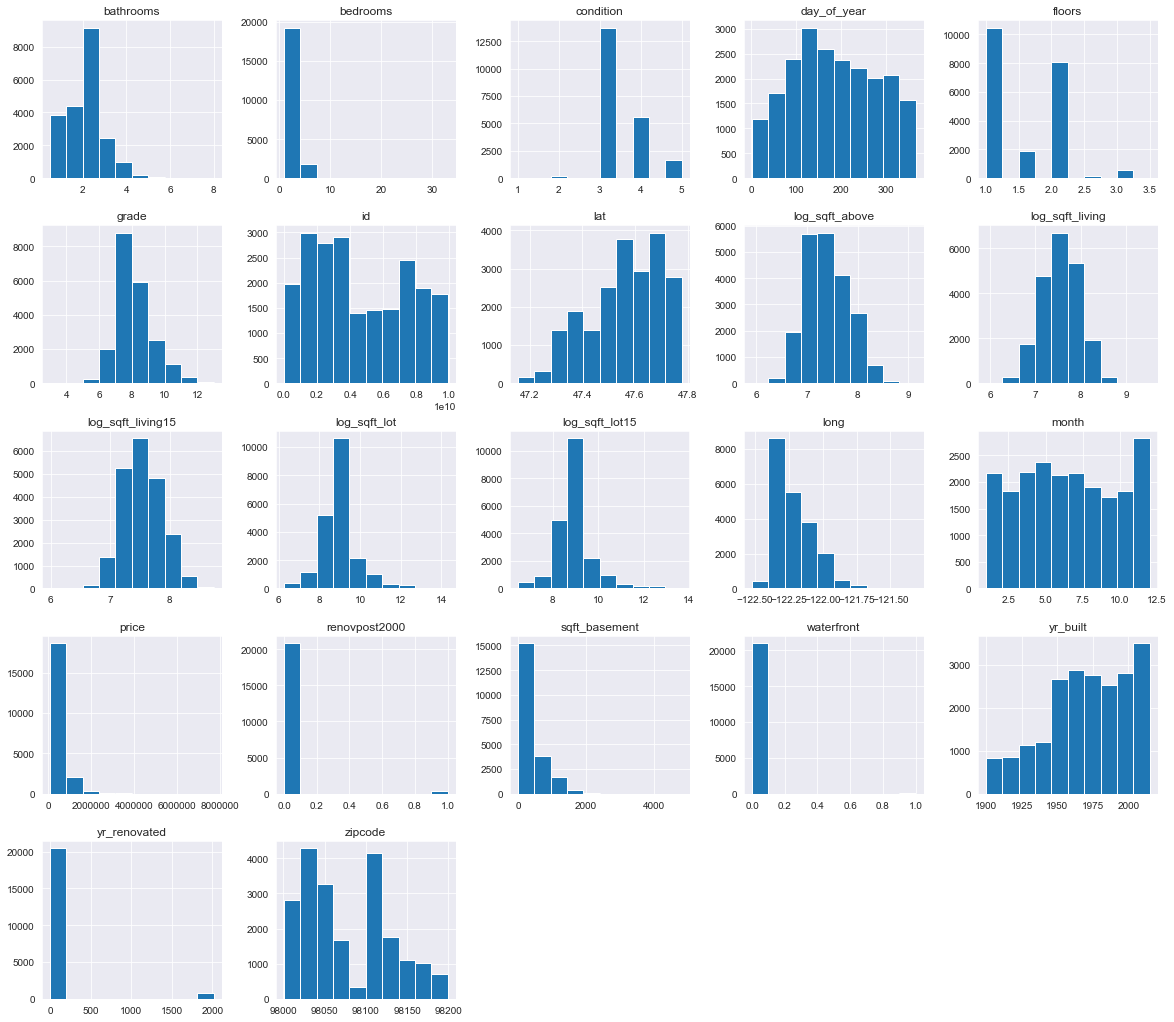

In [33]:
df_2.hist(figsize = (20,18));

### One assumption in linear regression is that the target variable is linearly related to the input features. Let's check this out for a few of our features with a joint plot.

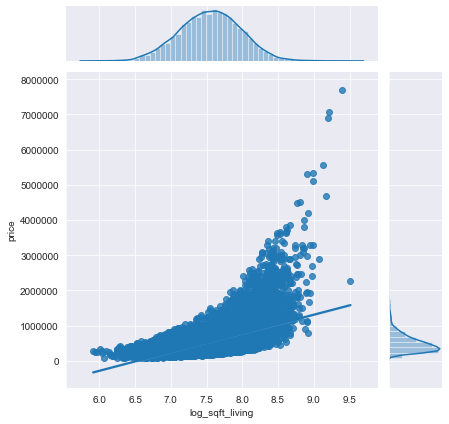

In [34]:
sns.jointplot('log_sqft_living','price', data=df_2, kind='reg');

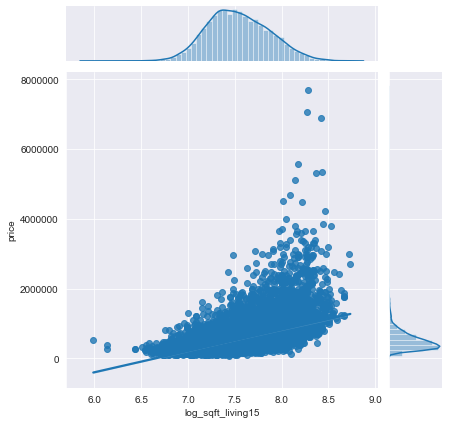

In [35]:
sns.jointplot('log_sqft_living15','price', data=df_2, kind='reg');

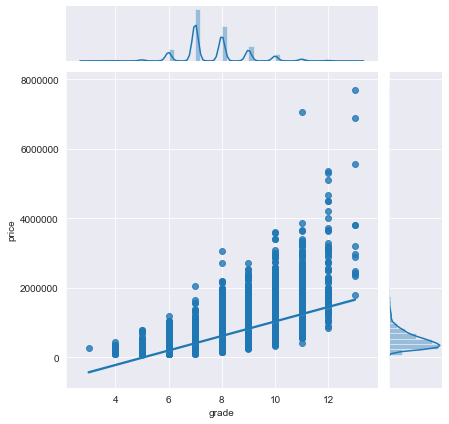

In [36]:
sns.jointplot('grade','price', data=df_2, kind='reg');

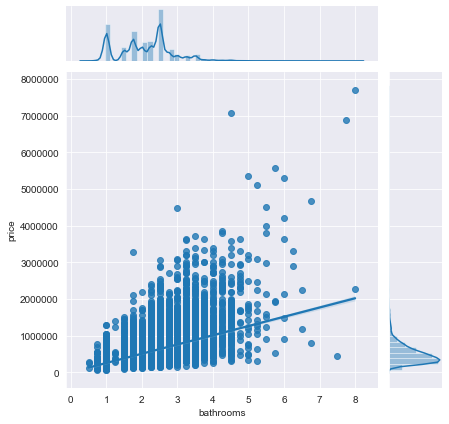

In [37]:
sns.jointplot('bathrooms','price', data=df_2, kind='reg');

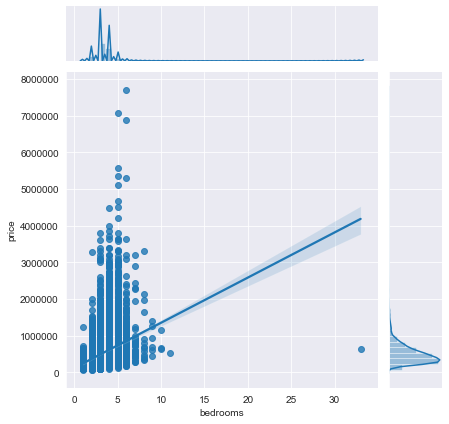

In [38]:
sns.jointplot('bedrooms','price', data=df_2, kind='reg');

In [39]:
# Bathrooms has a good linear relationship as do grade, sqft_living, and sqft_living15
# Must deal with outliers though. 

### Cat. Vars: Binning
- It seems that yr_built can be binned. Let's do that.

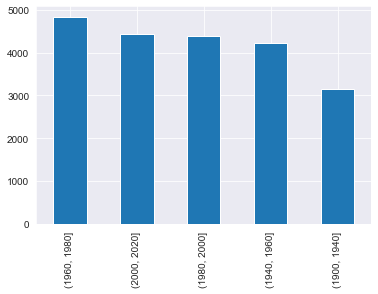

In [40]:
# create bins for based on observed values.
bins = [1900, 1940, 1960, 1980, 2000, 2020]
# use pd.cut
bins_yr = pd.cut(df_2['yr_built'], bins)

# using pd.cut returns ordered categories. Transform this to unordered categories.
bins_yr = bins_yr.cat.as_unordered()
bins_yr.value_counts().plot(kind='bar');

In [41]:
bins_yr.dtype

CategoricalDtype(categories=[(1900, 1940], (1940, 1960], (1960, 1980], (1980, 2000], (2000, 2020]],
              ordered=False)

In [42]:
# replace the existing "yr_built" column
df_2["yr_built"]=bins_yr

In [43]:
# I want to bin the zipcodes but zipcodes' relationship with price is interesting from what I have researched.
# Some very well-off neighborhoods can stand close to those that are less pricey. Perhaps it is worth keeping the zipcodes of the 10 highest and lowest priced zipcodes?

In [44]:
high = df_2.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
high_zip_list = high.keys().tolist()
df_2['high_zip'] = np.where(df_2['zipcode'].isin(high_zip_list), 1, 0)
print(high)
print(high_zip_list)

zipcode
98039    2.135612e+06
98004    1.357423e+06
98040    1.197904e+06
98112    1.100568e+06
98102    9.037020e+05
98109    8.769855e+05
98105    8.665815e+05
98119    8.614803e+05
98006    8.576191e+05
98005    8.102914e+05
Name: price, dtype: float64
[98039, 98004, 98040, 98112, 98102, 98109, 98105, 98119, 98006, 98005]


In [45]:
low = df_2.groupby('zipcode')['price'].mean().sort_values(ascending=False).tail(10)
low_zip_list = low.keys().tolist()
df_2['low_zip'] = np.where(df_2['zipcode'].isin(low_zip_list), 1, 0)
print(low)
print(low_zip_list)

zipcode
98031    300216.716981
98003    294996.183150
98030    294332.492000
98188    289984.465649
98148    284815.272727
98023    284697.260246
98001    281796.169972
98032    251594.333333
98168    241457.564885
98002    234512.742424
Name: price, dtype: float64
[98031, 98003, 98030, 98188, 98148, 98023, 98001, 98032, 98168, 98002]


In [46]:
print(df_2.high_zip.value_counts())
print(df_2.low_zip.value_counts())
df.head()

0    18977
1     2166
Name: high_zip, dtype: int64
0    18745
1     2398
Name: low_zip, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49,2


In [47]:
high_df = df_2[df_2['high_zip'] == 1]
high_df.groupby(['high_zip', 'zipcode'])['price'].describe()

count          mean           std       min        25%  \
high_zip zipcode                                                           
1        98004    315.0  1.357423e+06  7.482350e+05  425000.0   844250.0   
         98005    167.0  8.102914e+05  2.697881e+05  400000.0   636850.0   
         98006    490.0  8.576191e+05  4.421271e+05  247500.0   571250.0   
         98039     49.0  2.135612e+06  1.164626e+06  787500.0  1400000.0   
         98040    277.0  1.197904e+06  6.115932e+05  500000.0   825000.0   
         98102    100.0  9.037020e+05  8.053203e+05  330000.0   560625.0   
         98105    226.0  8.665815e+05  4.797375e+05  380000.0   550175.0   
         98109    105.0  8.769855e+05  4.592348e+05  216650.0   620000.0   
         98112    261.0  1.100568e+06  5.945344e+05  169317.0   683000.0   
         98119    176.0  8.614803e+05  4.393344e+05  300523.0   606050.0   

                        50%        75%        max  
high_zip zipcode                                   
1        98004    1150000.0  1695000.0  7060000.0  
         98005     762450.0   912500.0  1960000.0  
         98006     760184.5   977250.0  4210000.0  
         98039    1880000.0  2500000.0  6890000.0  
         98040     994000.0  1390000.0  5300000.0  
         98102     695000.0   976175.0  7700000.0  
         98105     677000.0  1017500.0  3650000.0  
         98109     736000.0   990000.0  3200000.0  
         98112     920000.0  1330000.0  3400000.0  
         98119     750000.0   942500.0  3070000.0

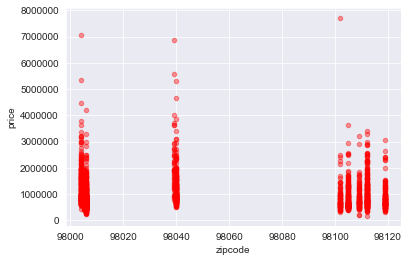

In [48]:
high_df.plot(kind='scatter', x='zipcode', y='price', alpha=0.4, color='r')

### Create Sectors using Long & Lat Information

In [50]:
df_test = df_2.copy()


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21143 non-null  int64   
 1   date               21143 non-null  object  
 2   price              21143 non-null  float64 
 3   bedrooms           21143 non-null  int64   
 4   bathrooms          21143 non-null  float64 
 5   floors             21143 non-null  float64 
 6   waterfront         21143 non-null  float64 
 7   condition          21143 non-null  int64   
 8   grade              21143 non-null  int64   
 9   sqft_basement      21143 non-null  float64 
 10  yr_built           21059 non-null  category
 11  yr_renovated       21143 non-null  float64 
 12  zipcode            21143 non-null  int64   
 13  lat                21143 non-null  float64 
 14  long               21143 non-null  float64 
 15  day_of_year        21143 non-null  int64   
 16  mont

In [55]:
col1        = 'lat'
col2        = 'long'
conditions  = [ (df_test[col1] > 47.5) & (df_test[col2] < -122.2) , 
                (df_test[col1] > 47.5) & (df_test[col2] > -122.2), 
                (df_test[col1] < 47.5) & (df_test[col2] < -122.2),
                (df_test[col1] < 47.5) & (df_test[col2] > -122.2)]
choices     = [ "1", '2', '3', '4']

In [56]:
df_test["sector"] = np.select(conditions, choices, default=np.nan)


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21143 non-null  int64   
 1   date               21143 non-null  object  
 2   price              21143 non-null  float64 
 3   bedrooms           21143 non-null  int64   
 4   bathrooms          21143 non-null  float64 
 5   floors             21143 non-null  float64 
 6   waterfront         21143 non-null  float64 
 7   condition          21143 non-null  int64   
 8   grade              21143 non-null  int64   
 9   sqft_basement      21143 non-null  float64 
 10  yr_built           21059 non-null  category
 11  yr_renovated       21143 non-null  float64 
 12  zipcode            21143 non-null  int64   
 13  lat                21143 non-null  float64 
 14  long               21143 non-null  float64 
 15  day_of_year        21143 non-null  int64   
 16  mont

In [62]:
df_test.sector.value_counts()

1      8976
2      5664
4      3427
3      3014
nan      62
Name: sector, dtype: int64

In [63]:
df_test.head(15)

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,renovpost2000,high_zip,low_zip,sector
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0.0,3,7,0.0,"(1940.0, 1960.0]",0.0,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,0,1
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,3,7,400.0,"(1940.0, 1960.0]",1991.0,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0.0,3,6,0.0,"(1900.0, 1940.0]",0.0,98028,47.7379,-122.233,56,2,6.646391,6.646391,7.908387,9.210340,8.994917,0,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0.0,5,7,910.0,"(1960.0, 1980.0]",0.0,98136,47.5208,-122.393,343,12,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0.0,3,8,0.0,"(1980.0, 2000.0]",0.0,98074,47.6168,-122.045,49,2,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,0,2
5,7237550310,2014-05-12,1230000.0,4,4.50,1.0,0.0,3,11,1530.0,"(2000.0, 2020.0]",0.0,98053,47.6561,-122.005,132,5,8.266164,8.597851,8.468003,11.532042,11.532042,0,0,0,2
6,2008000270,2015-01-15,291850.0,3,1.50,1.0,0.0,3,7,0.0,"(1960.0, 1980.0]",0.0,98198,47.4095,-122.315,15,1,6.966024,6.966024,7.408531,9.181015,9.181015,0,0,0,3
7,2414600126,2015-04-15,229500.0,3,1.00,1.0,0.0,3,7,730.0,"(1940.0, 1960.0]",0.0,98146,47.5123,-122.337,105,4,6.956545,7.484369,7.484369,8.918650,9.001223,0,0,0,1
8,3793500160,2015-03-12,323000.0,3,2.50,2.0,0.0,3,7,0.0,"(2000.0, 2020.0]",0.0,98038,47.3684,-122.031,71,3,7.544332,7.544332,7.779049,8.788746,8.931948,0,0,0,4
9,1736800520,2015-04-03,662500.0,3,2.50,1.0,0.0,3,8,1700.0,"(1960.0, 1980.0]",0.0,98007,47.6007,-122.145,93,4,7.528332,8.177516,7.700748,9.189729,9.096612,0,0,0,2


In [64]:
df_3 = df_test

In [65]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21143 non-null  int64   
 1   date               21143 non-null  object  
 2   price              21143 non-null  float64 
 3   bedrooms           21143 non-null  int64   
 4   bathrooms          21143 non-null  float64 
 5   floors             21143 non-null  float64 
 6   waterfront         21143 non-null  float64 
 7   condition          21143 non-null  int64   
 8   grade              21143 non-null  int64   
 9   sqft_basement      21143 non-null  float64 
 10  yr_built           21059 non-null  category
 11  yr_renovated       21143 non-null  float64 
 12  zipcode            21143 non-null  int64   
 13  lat                21143 non-null  float64 
 14  long               21143 non-null  float64 
 15  day_of_year        21143 non-null  int64   
 16  mont

In [70]:
del df_3['date']

In [71]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21143 non-null  int64   
 1   price              21143 non-null  float64 
 2   bedrooms           21143 non-null  int64   
 3   bathrooms          21143 non-null  float64 
 4   floors             21143 non-null  float64 
 5   waterfront         21143 non-null  float64 
 6   condition          21143 non-null  int64   
 7   grade              21143 non-null  int64   
 8   sqft_basement      21143 non-null  float64 
 9   yr_built           21059 non-null  category
 10  yr_renovated       21143 non-null  float64 
 11  zipcode            21143 non-null  int64   
 12  lat                21143 non-null  float64 
 13  long               21143 non-null  float64 
 14  day_of_year        21143 non-null  int64   
 15  month              21143 non-null  int64   
 16  log_

In [73]:
df_3.corr()

,id,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,renovpost2000,high_zip,low_zip
id,1.000000,-0.015796,0.002487,0.006120,0.019281,-0.002920,-0.023186,0.008681,-0.004548,-0.009225,-0.011183,-0.004728,0.021373,-0.010704,-0.010972,-0.000912,-0.001148,-0.003182,-0.148953,-0.146475,-0.005891,-0.004563,0.009610
price,-0.015796,1.000000,0.309204,0.525889,0.256355,0.265969,0.035290,0.667738,0.325008,0.116719,-0.053166,0.306507,0.022101,-0.011826,-0.010234,0.542387,0.611883,0.544671,0.161204,0.148068,0.103888,0.451751,-0.255204
bedrooms,0.002487,0.309204,1.000000,0.513840,0.179044,0.000061,0.025710,0.356882,0.302683,0.018452,-0.152628,-0.009521,0.131093,-0.002217,-0.001520,0.515674,0.621250,0.405475,0.184970,0.161747,0.032865,0.120079,-0.002644
bathrooms,0.006120,0.525889,0.513840,1.000000,0.504071,0.064626,-0.128015,0.666493,0.282693,0.047955,-0.204306,0.024994,0.224479,0.007443,0.008058,0.695560,0.761546,0.571997,0.099976,0.091383,0.060053,0.148682,-0.076877
floors,0.019281,0.256355,0.179044,0.504071,1.000000,0.020307,-0.264280,0.459214,-0.245144,0.003526,-0.058976,0.048977,0.125922,0.013227,0.013905,0.548124,0.368091,0.275729,-0.237104,-0.227203,0.002914,0.047548,-0.100857
waterfront,-0.002920,0.265969,0.000061,0.064626,0.020307,1.000000,0.016728,0.083602,0.084949,0.070231,0.028152,-0.011567,-0.036371,0.010418,0.009182,0.059020,0.079399,0.077438,0.071283,0.080974,0.017054,0.010413,-0.025758
condition,-0.023186,0.035290,0.025710,-0.128015,-0.264280,0.016728,1.000000,-0.148508,0.170972,-0.056205,0.003437,-0.015592,-0.106285,0.021466,0.021903,-0.151398,-0.051842,-0.090006,0.072183,0.078681,-0.070872,0.091384,-0.007336
grade,0.008681,0.667738,0.356882,0.666493,0.459214,0.083602,-0.148508,1.000000,0.168023,0.015882,-0.185131,0.113380,0.199187,0.007226,0.008571,0.743247,0.743322,0.688863,0.184189,0.185350,0.032464,0.250412,-0.127474
sqft_basement,-0.004548,0.325008,0.302683,0.282693,-0.245144,0.084949,0.170972,0.168023,1.000000,0.067145,0.075381,0.110637,-0.145174,0.005981,0.007052,-0.051499,0.423250,0.207061,0.093628,0.080550,0.074510,0.169675,-0.053353
yr_renovated,-0.009225,0.116719,0.018452,0.047955,0.003526,0.070231,-0.056205,0.015882,0.067145,1.000000,0.061752,0.029435,-0.064200,0.008314,0.007615,0.022694,0.046976,-0.002027,0.015903,0.015977,0.684825,0.062759,-0.046047


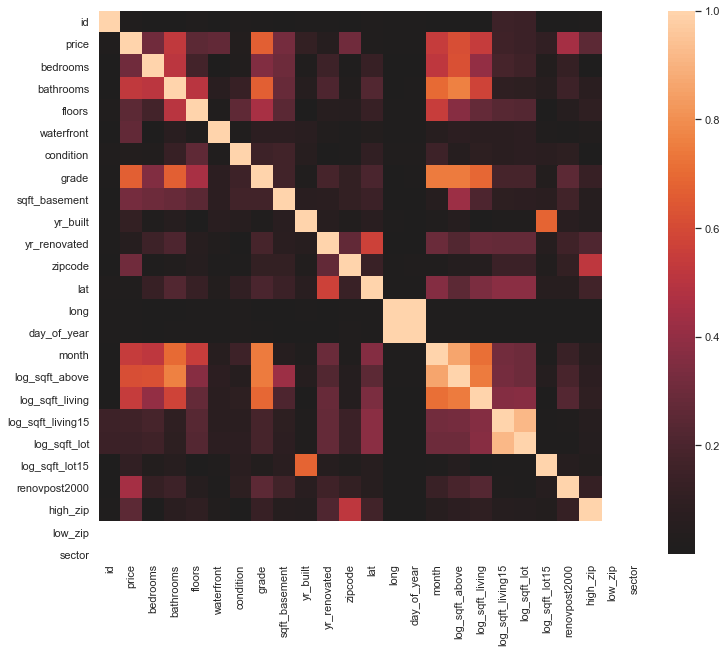

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df_3.corr()), center=.0, xticklabels=df_3.columns.values, yticklabels=df_3.columns.values);

In [78]:
abs(df_3.corr()) > 0.8

,id,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,renovpost2000,high_zip,low_zip
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [76]:
# logsqft_lot with logsqft_lot15
# logsqft_above with logsqft_living

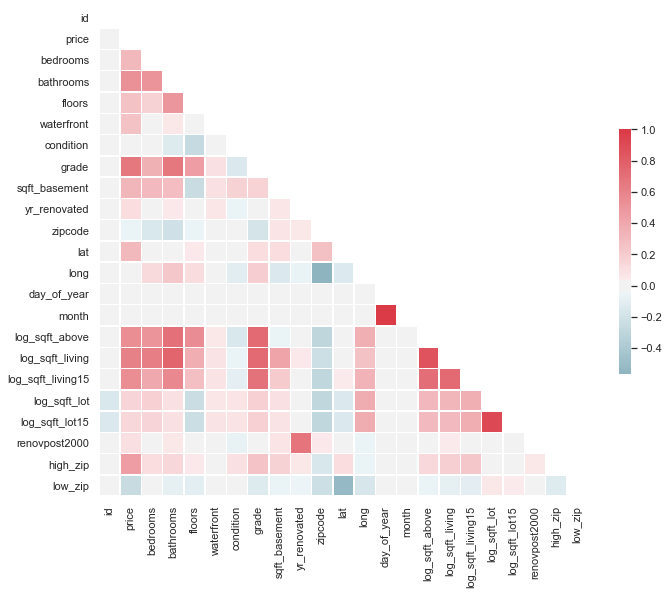

In [77]:
# Visualize with another heat map (prettier!)
sns.set(style="white")

# Create a covariance matrix
corr = df_3.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [79]:
df_3.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'day_of_year', 'month', 'log_sqft_above',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15', 'renovpost2000', 'high_zip', 'low_zip', 'sector'],
      dtype='object')

In [80]:
# Drop zipcode since we have extracted the relevant data 
del df_3['zipcode']

In [84]:
df_3.head()

,id,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,renovpost2000,high_zip,low_zip,sector
0,7129300520,221900.0,3,1.00,1.0,0.0,3,7,0.0,"(1940, 1960]",0.0,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,0,1
1,6414100192,538000.0,3,2.25,2.0,0.0,3,7,400.0,"(1940, 1960]",1991.0,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,0,1
2,5631500400,180000.0,2,1.00,1.0,0.0,3,6,0.0,"(1900, 1940]",0.0,47.7379,-122.233,56,2,6.646391,6.646391,7.908387,9.210340,8.994917,0,0,0,1
3,2487200875,604000.0,4,3.00,1.0,0.0,5,7,910.0,"(1960, 1980]",0.0,47.5208,-122.393,343,12,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1
4,1954400510,510000.0,3,2.00,1.0,0.0,3,8,0.0,"(1980, 2000]",0.0,47.6168,-122.045,49,2,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,0,2


In [87]:
# Label categorical variables as categorical 

df_3["waterfront"] = df_3["waterfront"].astype('category')
df_3["yr_built"] = df_3["yr_built"].astype('category')
df_3["renovpost2000"] = df_3["renovpost2000"].astype('category')
df_3["high_zip"] = df_3["high_zip"].astype('category')
df_3["low_zip"] = df_3["low_zip"].astype('category')
df_3["sector"] = df_3["sector"].astype('category')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21143 non-null  int64   
 1   price              21143 non-null  float64 
 2   bedrooms           21143 non-null  int64   
 3   bathrooms          21143 non-null  float64 
 4   floors             21143 non-null  float64 
 5   waterfront         21143 non-null  category
 6   condition          21143 non-null  int64   
 7   grade              21143 non-null  int64   
 8   sqft_basement      21143 non-null  float64 
 9   yr_built           21059 non-null  category
 10  yr_renovated       21143 non-null  float64 
 11  lat                21143 non-null  float64 
 12  long               21143 non-null  float64 
 13  day_of_year        21143 non-null  int64   
 14  month              21143 non-null  int64   
 15  log_sqft_above     21143 non-null  float64 
 16  log_

In [88]:
df_4 = pd.get_dummies(df_3)

df_4.head()

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_0.0,waterfront_1.0,"yr_built_(1900, 1940]","yr_built_(1940, 1960]","yr_built_(1960, 1980]","yr_built_(1980, 2000]","yr_built_(2000, 2020]",renovpost2000_0,renovpost2000_1,high_zip_0,high_zip_1,low_zip_0,low_zip_1,sector_1,sector_2,sector_3,sector_4,sector_nan
0,7129300520,221900.0,3,1.00,1.0,3,7,0.0,0.0,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2.0,3,7,400.0,1991.0,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0
2,5631500400,180000.0,2,1.00,1.0,3,6,0.0,0.0,47.7379,-122.233,56,2,6.646391,6.646391,7.908387,9.210340,8.994917,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1.0,5,7,910.0,0.0,47.5208,-122.393,343,12,6.956545,7.580700,7.215240,8.517193,8.517193,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0
4,1954400510,510000.0,3,2.00,1.0,3,8,0.0,0.0,47.6168,-122.045,49,2,7.426549,7.426549,7.495542,8.997147,8.923058,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0


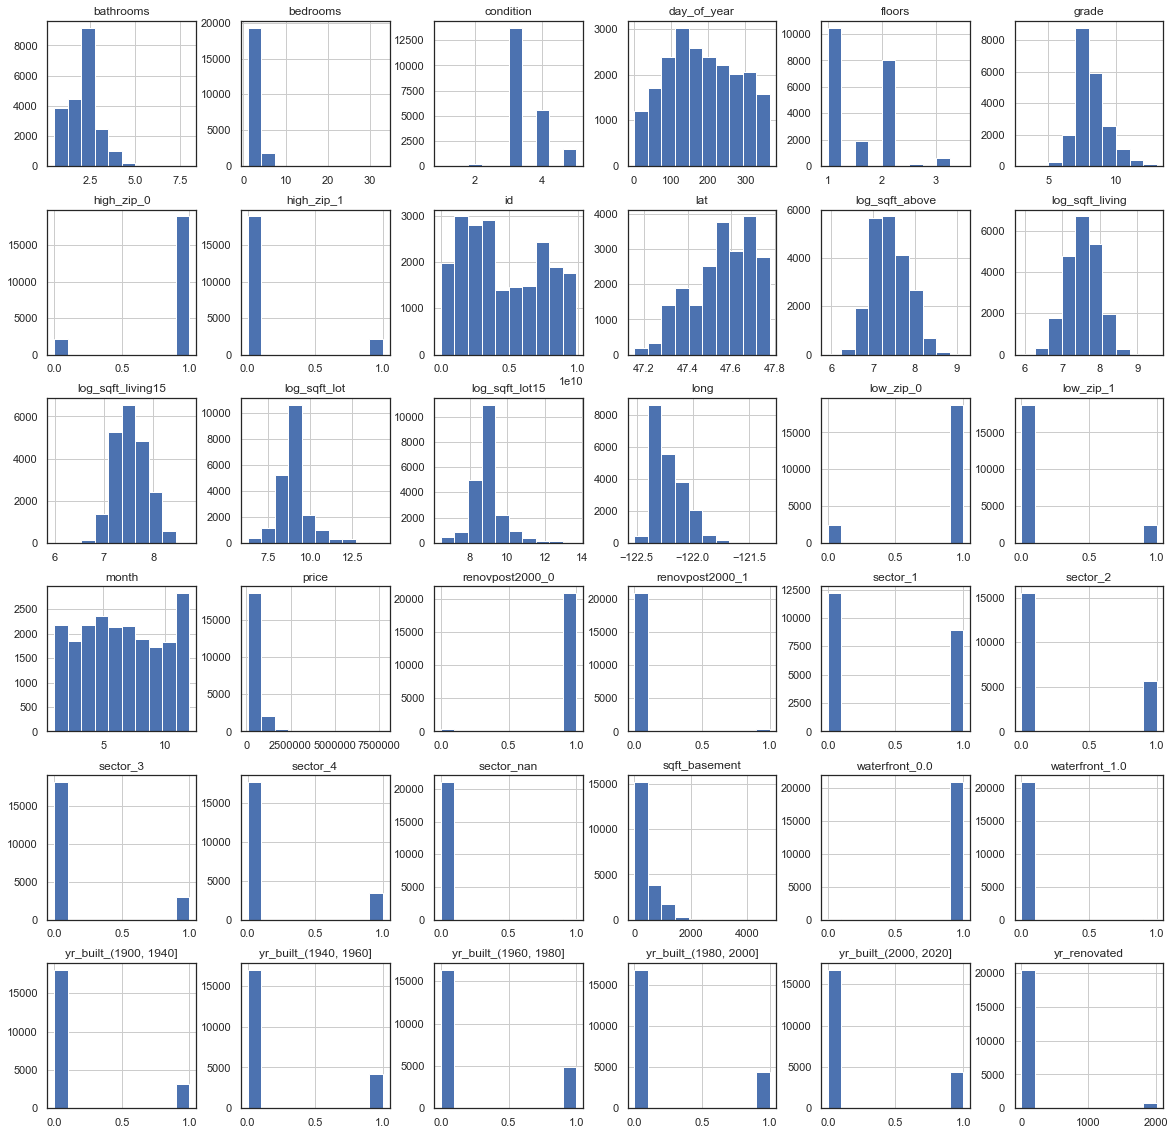

In [93]:
# view new columns
df_4.hist(figsize = [20,20]);

**Clean Up the Columns**

In [95]:
df_4.columns = [col.replace(' ', '_') for col in df_4.columns]
df_4.columns = [col.replace('.', '_') for col in df_4.columns]
df_4.columns = [col.replace(',', '') for col in df_4.columns]
df_4.columns = [col.replace('(', '') for col in df_4.columns]
df_4.columns = [col.replace(']', '') for col in df_4.columns]

In [96]:
df_4.columns.tolist()

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'floors',
 'condition',
 'grade',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'day_of_year',
 'month',
 'log_sqft_above',
 'log_sqft_living',
 'log_sqft_living15',
 'log_sqft_lot',
 'log_sqft_lot15',
 'waterfront_0_0',
 'waterfront_1_0',
 'yr_built_1900_1940',
 'yr_built_1940_1960',
 'yr_built_1960_1980',
 'yr_built_1980_2000',
 'yr_built_2000_2020',
 'renovpost2000_0',
 'renovpost2000_1',
 'high_zip_0',
 'high_zip_1',
 'low_zip_0',
 'low_zip_1',
 'sector_1',
 'sector_2',
 'sector_3',
 'sector_4',
 'sector_nan']

In [98]:
# Drop all one hot encoded columns equal to 0. 
df_4 = df_4.drop(['waterfront_0_0', 'renovpost2000_0', 'sector_nan', 'high_zip_0', 'low_zip_0'], axis =1)
print(df_4.shape)
df_4.head(2)

(21143, 31)


,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4
0,7129300520,221900.0,3,1.00,1.0,3,7,0.0,0.0,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2.0,3,7,400.0,1991.0,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,1,0,0,0


In [99]:
# drop lat and log - we have this in our sectors
df_4 = df_4.drop(['lat', 'long'], axis =1)
print(df_4.shape)

(21143, 29)


In [100]:
df_4.head()

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4
0,7129300520,221900.0,3,1.00,1.0,3,7,0.0,0.0,286,10,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2.0,3,7,400.0,1991.0,343,12,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,1,0,0,0
2,5631500400,180000.0,2,1.00,1.0,3,6,0.0,0.0,56,2,6.646391,6.646391,7.908387,9.210340,8.994917,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1.0,5,7,910.0,0.0,343,12,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1.0,3,8,0.0,0.0,49,2,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,0,0,1,0,0,0,0,0,1,0,0


## Perform a few more log transformations and min/max scale to normalize everything out

In [101]:
logprice = np.log(df_4['price'])
logbedrm = np.log(df_4['bedrooms'])
logbathrm = np.log(df_4['bathrooms'])

In [102]:
df_4['price'] = (logprice-min(logprice))/(max(logprice)-min(logprice))
df_4['log_sqft_living'] = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
df_4['log_sqft_lot'] = (log_sqft_lot-min(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))
df_4['log_sqft_above'] = (log_sqft_above-min(log_sqft_above))/(max(log_sqft_above)-min(log_sqft_above))
df_4['bedrooms'] = (logbedrm-min(logbedrm))/(max(logbedrm)-min(logbedrm))
df_4['bathrooms'] = (logbathrm-min(logbathrm))/(max(logbathrm)-min(logbathrm))
df_4['log_sqft_living15'] = (log_sqft_living15-min(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
df_4['log_sqft_lot15'] = (logbathrm-min(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))

### Let's normalize some histograms and add some KDE plots to examine our above variables

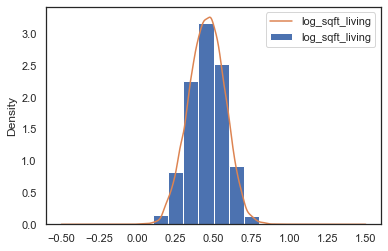

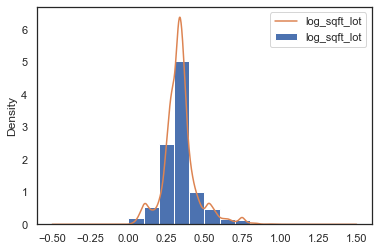

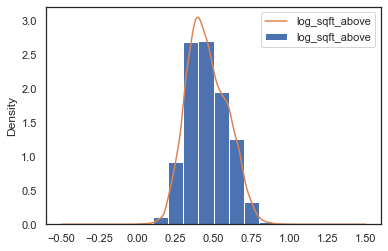

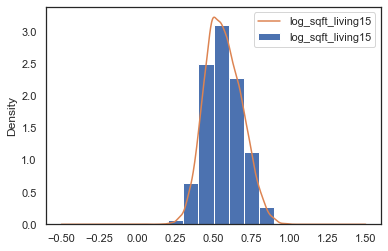

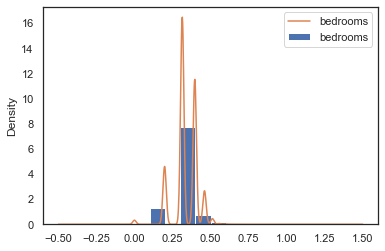

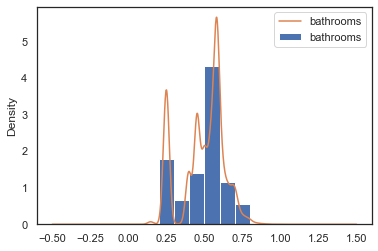

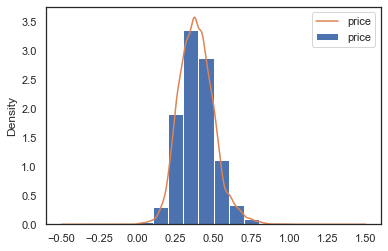

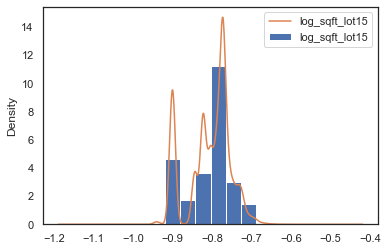

In [103]:
for column in ['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'bedrooms', 'bathrooms', 'price', 'log_sqft_lot15']:
    df_4[column].plot.hist(density=True )
    df_4[column].plot.kde(label=column )
    plt.legend()
    plt.show()

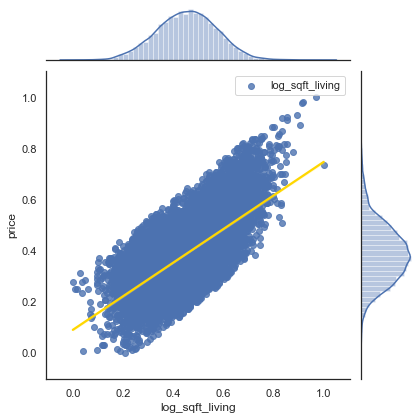

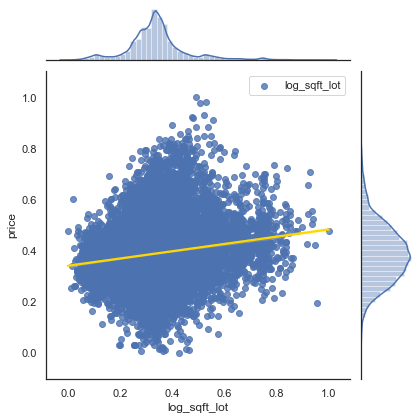

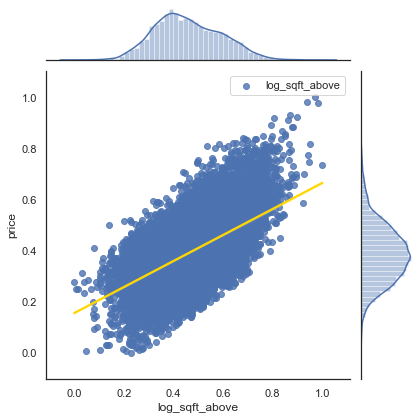

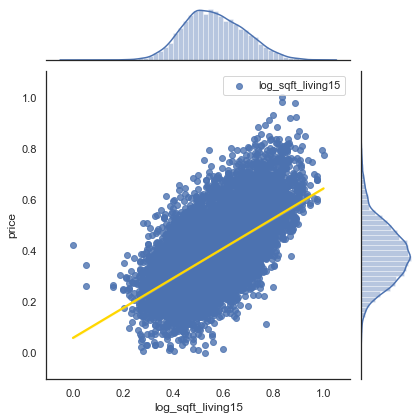

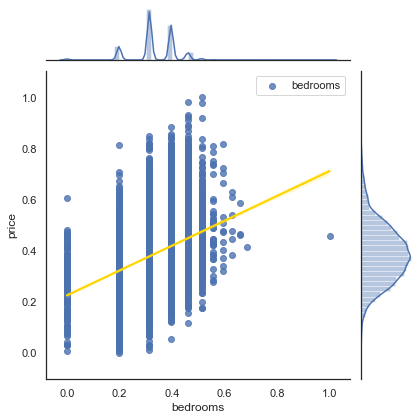

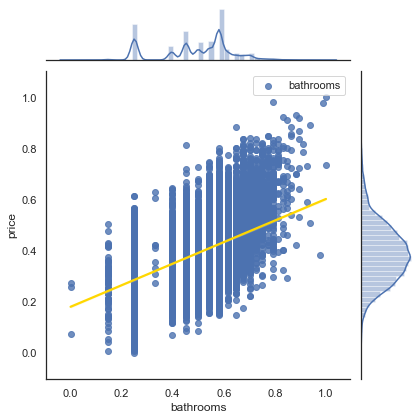

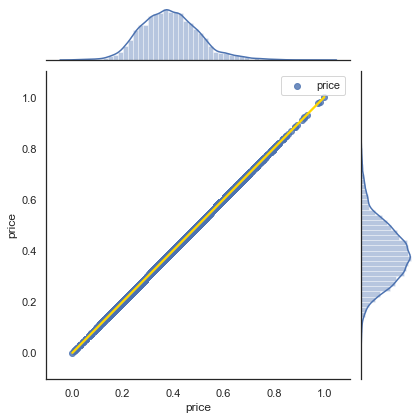

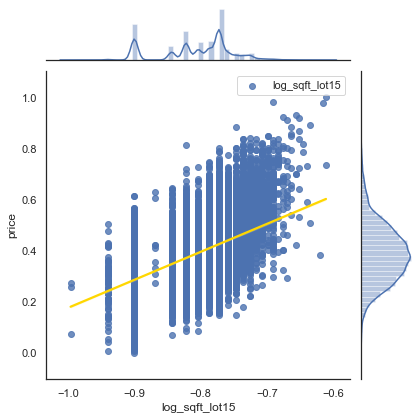

In [104]:
# Create a series of joint plots 

for column in ['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'bedrooms', 'bathrooms', 'price', 'log_sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df_4, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'gold'}})

    plt.legend()
    plt.show()

In [106]:
# Square Feet of House seems like it will be the most likely to affect the price.

## Model Part III Time
- With our variables adjusted, normalized, and generally taken care of. How will things shake out? Let's see!
- Will be in next notebook.

In [105]:
df_4.to_csv('final_df.csv', index=False)